## Pacakge Import

In [12]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
# Package to implement ML Algorithms
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

# Package for data partitioning
from sklearn.model_selection import train_test_split
# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Package for generating classification report
from sklearn.metrics import classification_report
# Import packages to implement Stratified K-fold CV
from sklearn.model_selection import KFold # For creating folds
# Import Package to implement GridSearch CV
from sklearn.model_selection import GridSearchCV
# Importing package for Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Package to record time
import time
# Package for Data pretty printer
from pprint import pprint
# Module to save and load Python objects to and from files
import pickle 
# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')
# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

## File Import / Pre-Processing

In [13]:
# Import Data
df = pd.read_csv('Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [14]:
#sort out the date_time columns
df['month'] = pd.to_datetime(df['date_time']).dt.month_name()
df['weekday'] = pd.to_datetime(df['date_time']).dt.day_name()
df['hour'] = pd.to_datetime(df['date_time']).dt.hour
df['holiday'] = df['holiday'].fillna("None")
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,weekday,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,October,Tuesday,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,October,Tuesday,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,October,Tuesday,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,October,Tuesday,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,October,Tuesday,13


In [15]:
# Select input and output features
X = df.drop(columns = ['traffic_volume','date_time','weather_description'])
y = df['traffic_volume']

In [16]:
# One hot encoding for categorical variables
cat_var = ['holiday', 'weather_main', 'hour', 'month', 'weekday']
X_encoded = pd.get_dummies(X, columns = cat_var)
X_encoded.head()

,temp,rain_1h,snow_1h,clouds_all,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,...,month_November,month_October,month_September,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,288.28,0.0,0.0,40,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,289.36,0.0,0.0,75,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,289.58,0.0,0.0,90,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,290.13,0.0,0.0,90,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,291.14,0.0,0.0,75,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [17]:
# Data partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.3, random_state = 42)

In [18]:
# Creating folds
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

## Decision Tree

In [20]:
# Define model
regressor_dt = DecisionTreeRegressor(random_state = 42)

### Hyperparameter Tuning

In [37]:
# Start with an initial guess for parameters
hyper_params = {
    'max_depth': [100, 200, 300, 400],
    'min_samples_split': [20, 40, 60],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

In [38]:
# Call RandomizedSearchCV()
model_dt = RandomizedSearchCV(estimator = regressor_dt, 
                              param_distributions = hyper_params,
                              n_iter = 100,
                              scoring = 'r2', 
                              cv = folds, 
                              verbose = 1,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs 

In [39]:
# Fit the model
start = time.time()            # Start Time
model_dt.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Training time: 31.44976782798767s


In [40]:
# Return the performance metric score
print('Initial score: ', model_dt.best_score_)

# Return set of parameters with the best performance
print('Initial parameters: ', model_dt.best_params_)

Initial score:  0.9373203554389576
Initial parameters:  {'min_samples_split': 60, 'min_samples_leaf': 10, 'max_depth': 100}


### Optimal Hyperparameter Tuning

In [21]:
# Adapt grid based on result from initial grid search
hyper_params_new = {
    'max_depth': [25, 30, 35, 40],
    'min_samples_leaf': [5, 6, 7, 8],
    'min_samples_split': [70, 75, 80, 85]
}

hyper_params_new

{'max_depth': [25, 30, 35, 40],
 'min_samples_leaf': [5, 6, 7, 8],
 'min_samples_split': [70, 75, 80, 85]}

In [22]:
# Call GridSearchCV()
model_dt = GridSearchCV(estimator = regressor_dt, 
                        param_grid = hyper_params_new, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs 

In [23]:
# Fit the model
start = time.time()            # Start Time
model_dt.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Training time: 13.507226705551147s


In [24]:
print('Improved score: ', model_dt.best_score_)
print('Improved parameters: ', model_dt.best_params_)

Improved score:  0.9374749678798054
Improved parameters:  {'max_depth': 35, 'min_samples_leaf': 8, 'min_samples_split': 75}


### Store Best Model

In [25]:
best_dt = model_dt.best_estimator_

### Test Set

In [23]:
y_pred = best_dt.predict(test_X)
dt_r2 = sklearn.metrics.r2_score(test_y, y_pred).round(3)
dt_rmse = np.sqrt(sklearn.metrics.mean_squared_error(test_y, y_pred)).round(3)
dt_rmse

472.227

### Feature Importance Plot

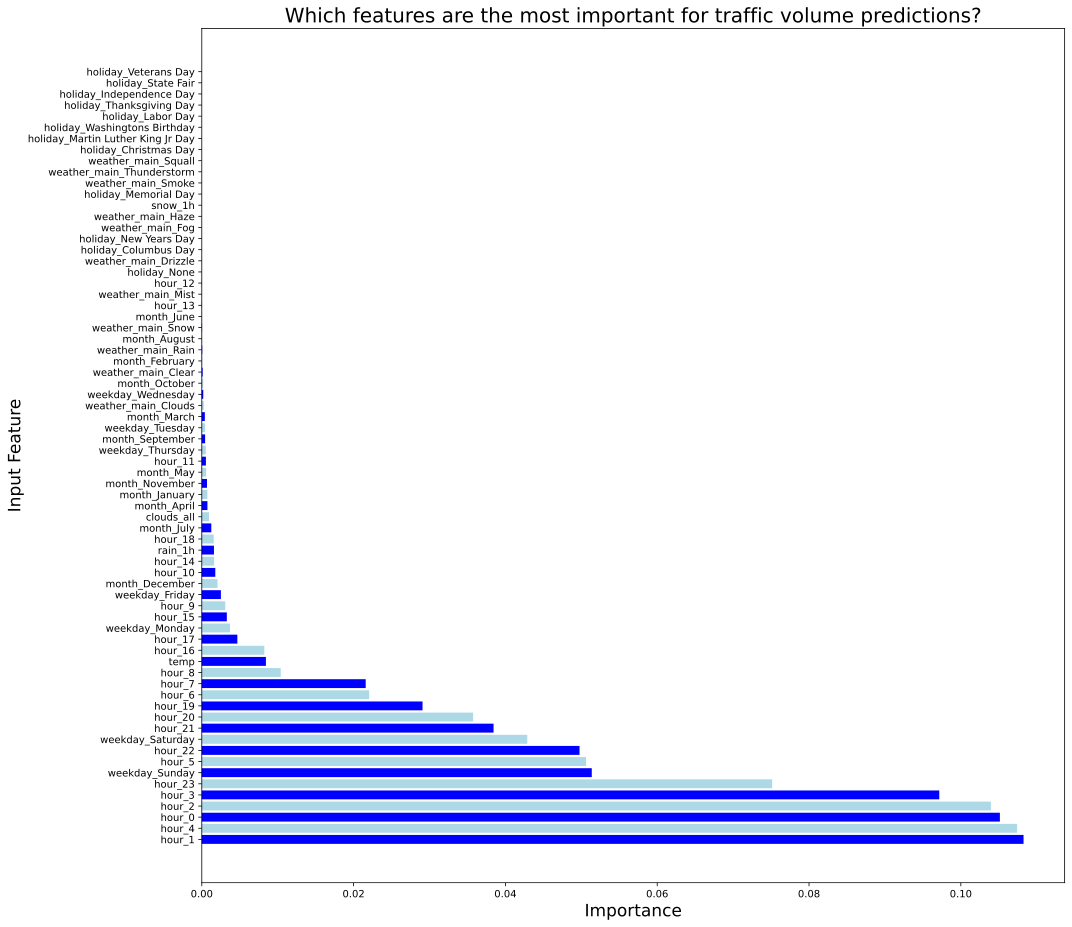

In [42]:
# Storing importance values from the trained model
importance = best_dt.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)


# Bar plot
fig = plt.figure(figsize=(15, 13))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['blue', 'lightblue'])

plt.xlabel("Importance", fontsize=17)
plt.ylabel("Input Feature", fontsize=17)
plt.title('Which features are the most important for traffic volume predictions?', fontsize=20) 
plt.tight_layout();

#Saving Decision Tree
fig.savefig("dt_feature_imp.svg", bbox_inches='tight')

### Pickling

In [34]:
dt_pickle = open('dt_traffic_volume.pickle', 'wb') 

# Write DT model to the file
pickle.dump(best_dt, dt_pickle) 

# Close the file
dt_pickle.close() 

In [22]:
#import pickle
filename= 'dt_traffic_volume.pickle'
best_dt = pickle.load(open(filename,'rb'))

## Random Forest

In [35]:
# Define model
regressor_rf = RandomForestRegressor(random_state = 42)

### Hyperparameter Tuning

In [9]:
# Start with an initial guess for parameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 5)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 5)]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 20]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [2, 6, 11, 15, 20],
 'min_samples_leaf': [5, 10, 20],
 'min_samples_split': [5, 10, 20],
 'n_estimators': [50, 162, 275, 387, 500]}


In [10]:
# Call RandomizedSearchCV()
model_rf = RandomizedSearchCV(estimator = regressor_rf, 
                              param_distributions = random_grid,
                              n_iter = 100,
                              scoring = 'r2', 
                              cv = folds, 
                              verbose = 1,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs 

In [11]:
# Fit the model
start = time.time()            # Start Time
model_rf.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training time: 1563.566400051117s


In [12]:
print('Initial score: ', model_rf.best_score_)
print('Initial parameters: ', model_rf.best_params_)

Initial score:  0.9357676069707073
Initial parameters:  {'n_estimators': 387, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 20}


### Optimal Hyperparameter Tuning

In [36]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [19, 20, 21],
    'min_samples_leaf': [3, 5, 7],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [300, 350, 400]
}

pprint(param_grid)

{'max_depth': [19, 20, 21],
 'min_samples_leaf': [3, 5, 7],
 'min_samples_split': [3, 5, 7],
 'n_estimators': [300, 350, 400]}


In [37]:
# Call GridSearchCV()
model_rf = GridSearchCV(estimator = regressor_rf, 
                        param_grid = param_grid, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs 

In [38]:
# Fit the model
start = time.time()            # Start Time
model_rf.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Training time: 2796.265367746353s


In [39]:
print('Improved score: ', model_rf.best_score_)
print('Improved parameters: ', model_rf.best_params_)

Improved score:  0.9378898078797017
Improved parameters:  {'max_depth': 21, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 350}


### Store Best Model

In [40]:
best_rf = model_rf.best_estimator_

### Test Set

In [20]:
y_pred = best_rf.predict(test_X)
rf_r2 = sklearn.metrics.r2_score(test_y, y_pred).round(3)
rf_rmse = np.sqrt(sklearn.metrics.mean_squared_error(test_y, y_pred)).round(3)

### Feature Importance Plot

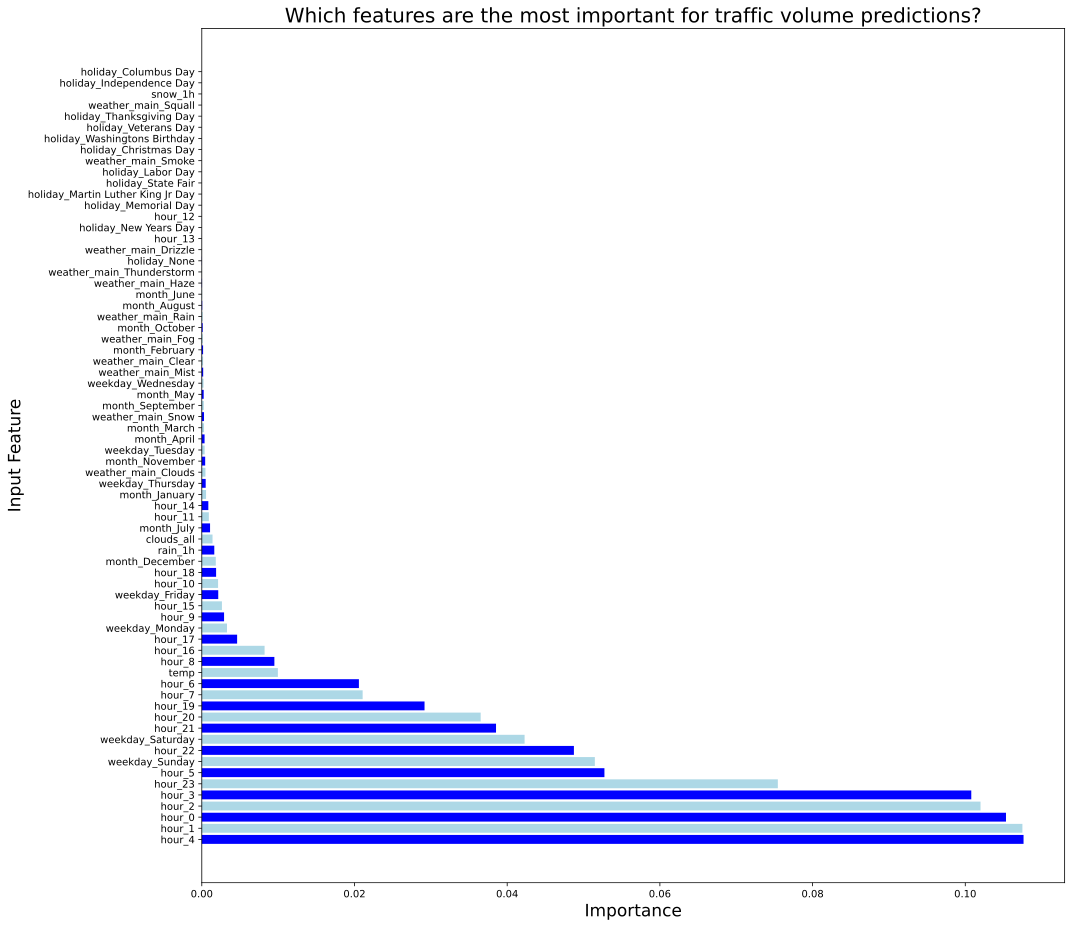

In [43]:
# Storing importance values from the trained model
importance = best_rf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)


# Bar plot
fig = plt.figure(figsize=(15, 13))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['blue', 'lightblue'])

plt.xlabel("Importance",fontsize=17)
plt.ylabel("Input Feature",fontsize=17)
plt.title('Which features are the most important for traffic volume predictions?',fontsize=20) 
plt.tight_layout();

#Saving Decision Tree
fig.savefig("rf_feature_imp.svg", bbox_inches='tight')

### Pickling

In [45]:
rf_pickle = open('rf_traffic_volume.pickle', 'wb') 

# Write DT model to the file
pickle.dump(best_rf, rf_pickle) 

# Close the file
rf_pickle.close() 

In [19]:
#import pickle
filename= 'rf_traffic_volume.pickle'
best_rf = pickle.load(open(filename,'rb'))

## Adaboost

In [46]:
regressor_ab = AdaBoostRegressor(random_state=42)

### Hyperparameter Tuning

In [24]:
hyper_params = {'n_estimators':[100,300,500],
             'learning_rate':[0.01,0.05,0.1]}

In [25]:
model_ab = GridSearchCV(estimator = regressor_ab, 
                        param_grid = hyper_params, 
                        cv=folds, 
                        scoring='r2', 
                        n_jobs = -1, 
                        verbose = 1)

In [26]:
# Fit the model
start = time.time()            # Start Time
model_ab.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training time: 193.25386595726013s


In [27]:
print('Improved score: ', model_ab.best_score_)
print('Improved parameters: ', model_ab.best_params_)

Improved score:  0.3514243881154184
Improved parameters:  {'learning_rate': 0.01, 'n_estimators': 300}


### Optimal Hyperparameter Tuning

In [47]:
hyper_params = {'n_estimators':[200,300,400],
             'learning_rate':[0.005,0.01,0.025]}

In [48]:
model_ab = GridSearchCV(estimator = regressor_ab, 
                        param_grid = hyper_params, 
                        cv=folds, 
                        scoring='r2', 
                        n_jobs = -1, 
                        verbose = 1)

In [49]:
# Fit the model
start = time.time()            # Start Time
model_ab.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training time: 237.58843183517456s


In [50]:
print('Improved score: ', model_ab.best_score_)
print('Improved parameters: ', model_ab.best_params_)

Improved score:  0.3524982289211645
Improved parameters:  {'learning_rate': 0.01, 'n_estimators': 400}


### Store Best Model

In [51]:
best_ab = model_ab.best_estimator_

### Test Set

In [32]:
y_pred = best_ab.predict(test_X)
ab_r2 = sklearn.metrics.r2_score(test_y, y_pred).round(3)
ab_rmse = np.sqrt(sklearn.metrics.mean_squared_error(test_y, y_pred)).round(3)

### Feature Importance Plot

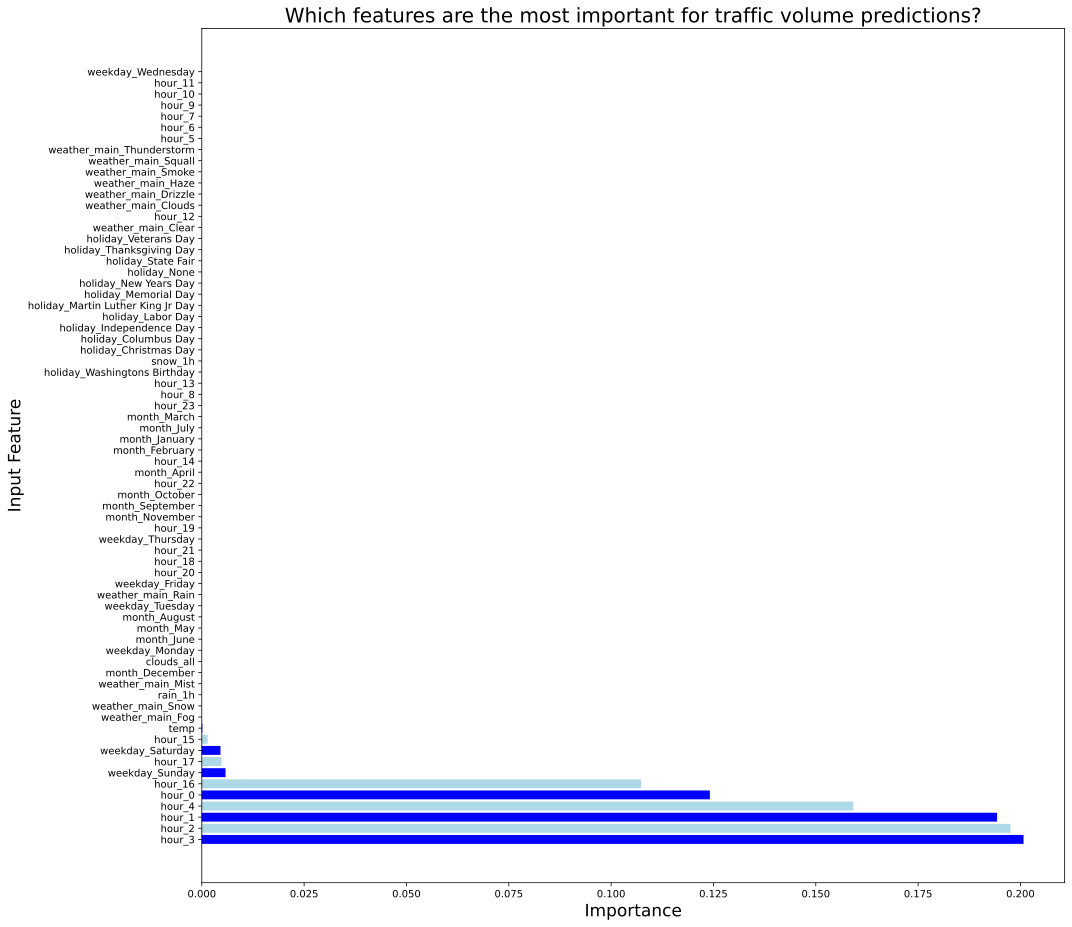

In [45]:
# Storing importance values from the trained model
importance = best_ab.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)


# Bar plot
fig = plt.figure(figsize=(15, 13))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['blue', 'lightblue'])

plt.xlabel("Importance",fontsize=17)
plt.ylabel("Input Feature",fontsize=17)
plt.title('Which features are the most important for traffic volume predictions?',fontsize=20) 
plt.tight_layout();

#Saving Decision Tree
fig.savefig("ab_feature_imp.svg", bbox_inches='tight')

### Pickling

In [55]:
ab_pickle = open('ab_traffic_volume.pickle', 'wb') 

# Write DT model to the file
pickle.dump(best_ab, ab_pickle) 

# Close the file
ab_pickle.close() 

In [31]:
#import pickle
filename= 'ab_traffic_volume.pickle'
best_ab = pickle.load(open(filename,'rb'))

## XGBoost

In [56]:
regressor_xgb = xgb.XGBRegressor(random_state=42)

### Hyperparameter Tuning

In [41]:
hyper_params_XGB = {'max_depth': [10,30,50],
              'n_estimators': [100,300,500],
              'learning_rate':[0.01, 0.05, 0.1],
              'gamma': [0.01,0.05,0.1]}

In [40]:
model_xgb = GridSearchCV(estimator = regressor_xgb, 
                        param_grid = hyper_params_XGB, 
                        cv=folds, 
                        scoring='r2', 
                        n_jobs = -1, 
                        verbose = 1)

In [42]:
# Fit the model
start = time.time()            # Start Time
model_xgb.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Training time: 1890.1453695297241s


In [43]:
print('Improved score: ', model_xgb.best_score_)
print('Improved parameters: ', model_xgb.best_params_)

Improved score:  0.9453319340245342
Improved parameters:  {'gamma': 1, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300}


### Optimal Hyperparameter Tuning

In [65]:
optimal_hyper_params_XGB = {'max_depth': [5,7,9],
              'n_estimators': [350,370, 390],
              'learning_rate':[0.07, 0.09, 0.12],
              'gamma': [0.5, 0.7, 0.9]}

In [66]:
model_xgb = GridSearchCV(estimator = regressor_xgb, 
                        param_grid = optimal_hyper_params_XGB, 
                        cv=folds, 
                        scoring='r2', 
                        n_jobs = -1, 
                        verbose = 1)

In [67]:
# Fit the model
start = time.time()            # Start Time
model_xgb.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Training time: 124.91232228279114s


In [68]:
print('Improved score: ', model_xgb.best_score_)
print('Improved parameters: ', model_xgb.best_params_)

Improved score:  0.9460678321860261
Improved parameters:  {'gamma': 0.7, 'learning_rate': 0.09, 'max_depth': 7, 'n_estimators': 390}


### Save Best Model

In [69]:
best_xgb = model_xgb.best_estimator_

### Test Set

In [29]:
y_pred = best_xgb.predict(test_X)
xgb_r2 = sklearn.metrics.r2_score(test_y, y_pred).round(3)
xgb_rmse = np.sqrt(sklearn.metrics.mean_squared_error(test_y, y_pred)).round(3)

### Feature Importance Plot

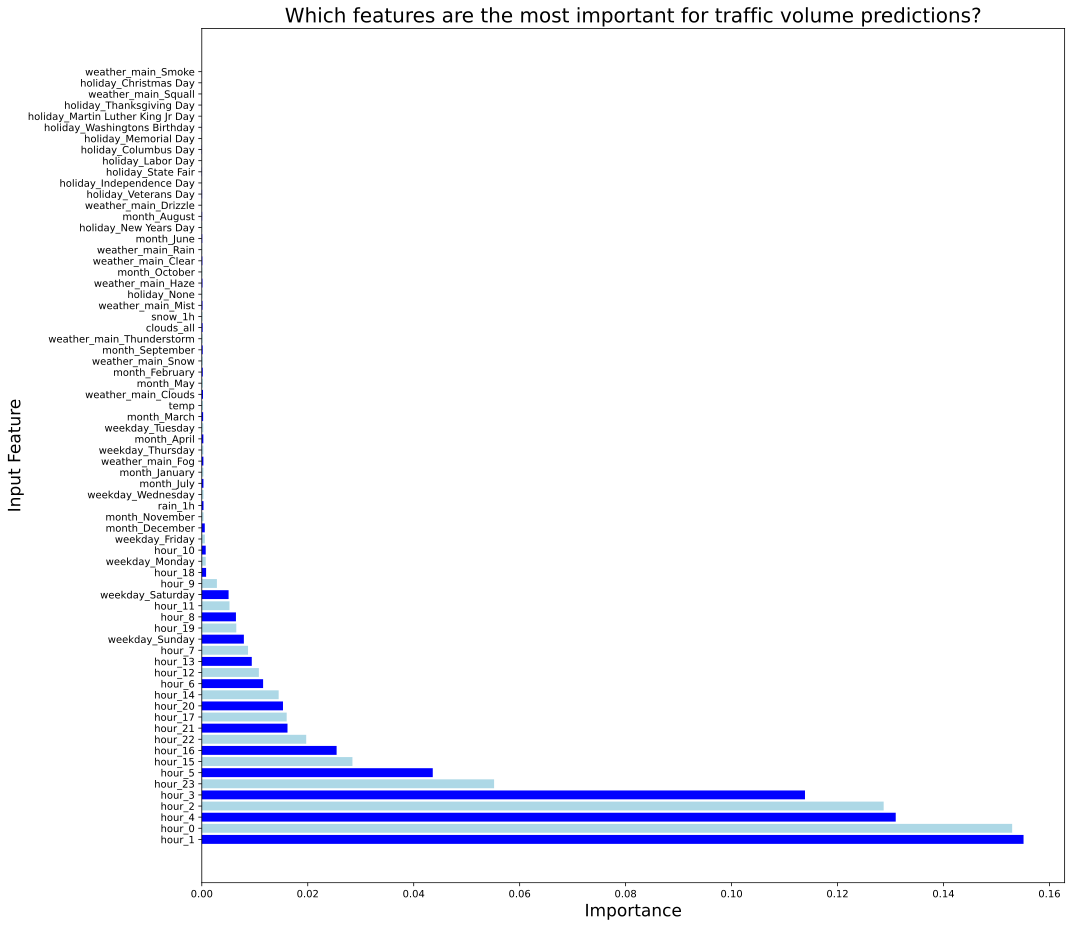

In [48]:
# Storing importance values from the trained model
importance = best_xgb.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)


# Bar plot
fig = plt.figure(figsize=(15, 13))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['blue', 'lightblue'])

plt.xlabel("Importance",fontsize=17)
plt.ylabel("Input Feature",fontsize=17)
plt.title('Which features are the most important for traffic volume predictions?',fontsize=20) 
plt.tight_layout();

#Saving Decision Tree
fig.savefig("xgb_feature_imp.svg", bbox_inches='tight')

### Pickling

In [72]:
xgb_pickle = open('xgb_traffic_volume.pickle', 'wb') 

# Write DT model to the file
pickle.dump(best_xgb, xgb_pickle) 

# Close the file
xgb_pickle.close() 

In [28]:
#import pickle
filename= 'xgb_traffic_volume.pickle'
best_xgb = pickle.load(open(filename,'rb'))

## Training Set Analysis

In [37]:
ml_analysis = {'ML Model': ['Decision Tree','Random Forest','AdaBoost','XGBoost'], 
               'R2': [dt_r2, rf_r2, ab_r2, xgb_r2],
        'RMSE': [dt_rmse, rf_rmse, ab_rmse, xgb_rmse]}
ml_analysis_df = pd.DataFrame(ml_analysis)
ml_analysis_df

,ML Model,R2,RMSE
0,Decision Tree,0.944,472.227
1,Random Forest,0.943,476.435
2,AdaBoost,0.330,1632.178
3,XGBoost,0.953,430.963


In [38]:
ml_analysis_df.to_csv('ml_analysis.csv')